In [ ]:
!pip install torch torchvision
!pip install matplotlib

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models , layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70, 228, 213, 220, 224,
        252, 239, 219, 217, 231, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 214, 218, 216,
        210, 215, 217, 202, 224, 172,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24, 254, 214, 210, 211,
        214, 215, 212, 203, 221, 167,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 216, 215, 217,
        217, 216, 216, 206, 225, 150,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        216, 214, 212, 203, 226, 136,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 245, 216, 214, 216,
        217, 215, 211, 204, 225, 125,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        220, 217, 213, 203, 222, 147,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 216, 215, 218,
        222, 216, 214, 207, 218, 179,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 216, 217, 219,
        222, 217, 214, 210, 215, 211,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 255, 214, 218, 219,
        224, 218, 215, 211, 211, 231,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  79, 227, 209, 219, 219,
        227, 219, 215, 213, 206, 254,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 226, 211, 220, 219,
        228, 218, 215, 216, 205, 219, 163,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 221, 214, 221, 219,
        231, 218, 215, 218, 213, 212, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 234, 217, 216, 220, 219,
        234, 217, 215, 218, 216, 223, 247,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  17, 254, 212, 219, 219, 220,
        233, 214, 216, 219, 222, 153, 238,  58,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  66, 255, 208, 220, 219, 222,
        241, 220, 218, 218, 218, 192, 242,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 142, 235, 203, 218, 216, 231,
        242, 225, 233, 219, 214, 216, 238, 144,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177, 248, 227, 229, 211, 255,
         76,   0, 247, 243, 230, 230, 249, 187,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
Y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
X_test[4]

array([[  0,   0,   0,   2,   0,   1,   1,   0,   0,   0,   0,  57,  67,
         73,  76,  76,  83,  62,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   1,   0,   0,  13,  79, 128, 201, 162,
        161, 173, 192, 172, 181, 184, 108,  30,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 102, 139, 142, 103, 115, 162,
        154, 165, 153, 139, 129, 150, 138, 171, 161,  26,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 106, 124, 108, 103, 106,  93, 100,
        180, 156, 147, 138,  85, 157, 114, 124, 154, 157,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,  29, 134, 101, 113, 108,  97, 116,  81,
        146, 183, 164, 111, 146, 131, 122, 132, 145, 169,  93,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  65, 131, 105, 101, 108, 100, 104,  97,
         74, 206, 174, 115, 150, 108, 119, 146, 152, 162, 141,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 108, 123, 112, 106,  98, 100, 101, 111,
         72, 136, 132, 112, 115, 109, 142, 150, 160, 162, 195,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 122, 119, 112,  83,  93,  97, 106,
        115,  91, 109,  83, 109, 125, 165, 140, 193, 160, 176,   6,   0,
          0,   0],
       [  0,   0,   0,   0,  23, 135, 132, 149, 104,  78,  96,  97, 103,
        108, 108, 115,  84, 114, 149, 158, 147, 209, 160, 178,  52,   0,
          0,   0],
       [  0,   0,   0,   0,  57, 124, 131, 160, 103,  96, 101, 109, 109,
        111, 108, 114, 106, 113, 156, 163, 156, 196, 167, 174,  85,   0,
          0,   0],
       [  0,   0,   0,   0,  86, 116, 126, 160, 132, 102,  96, 104, 107,
         98,  93, 123, 116, 112, 149, 160, 181, 186, 162, 162, 123,   0,
          0,   0],
       [  0,   0,   0,   0, 112, 114, 112, 167, 146, 100, 100, 101, 107,
         96, 100, 126, 103, 120, 141, 158, 167, 187, 147, 148, 170,   0,
          0,   0],
       [  0,   0,   0,   0, 124, 118, 101, 197,  89, 101, 100,  96, 108,
        103, 108, 122, 107, 127, 139, 150, 119, 196, 145, 142, 179,   0,
          0,   0],
       [  0,   0,   0,   0, 131, 115,  97, 198,  47, 108,  96,  96, 106,
        119, 102, 120, 103, 123, 140, 150,  81, 206, 146, 135, 194,   0,
          0,   0],
       [  0,   0,   0,   4, 136, 118,  98, 193,  21, 109,  96, 106, 102,
        129, 100, 119, 102, 118, 141, 153,  45, 216, 148, 139, 205,  12,
          0,   0],
       [  0,   0,   0,  24, 137, 117, 101, 187,  25, 113,  92, 112,  94,
        120, 105, 127,  97, 115, 142, 150,  19, 213, 148, 131, 204,  36,
          0,   0],
       [  0,   0,   0,  40, 141, 109, 117, 158,  12, 124,  90, 116,  96,
        117, 113, 136,  94, 111, 147, 163,  31, 191, 146, 134, 206,  58,
          0,   0],
       [  0,   0,   0,  39, 129, 102, 147, 119,   0, 120,  90, 119, 101,
        116, 106, 127, 102, 114, 146, 180,  20, 146, 159, 129, 204,  70,
          0,   0],
       [  0,   0,   0,  58, 126, 111, 162, 101,  21, 132,  89, 123, 108,
        106, 102, 126, 111, 116, 141, 178,  50, 112, 169, 138, 164,  84,
          0,   0],
       [  0,   0,   0, 108, 134, 134, 185,  84,  73, 123,  87, 122, 111,
        102, 106, 128, 114, 109, 134, 174,  97,  98, 160, 147, 175, 135,
          0,   0],
       [  0,   0,   0,  97, 142, 169, 198,  37,  84, 107,  97, 122, 112,
        109, 112, 126, 102,  96, 131, 172, 128,  51, 254, 168, 164, 111,
          0,   0],
       [  0,   0,   0,   0,   0,  12,  46,   2, 119, 102, 109, 123,  96,
        116, 122, 132, 106, 106, 129, 151, 184,  26,  20,   8,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13, 137, 101, 114, 100, 106,
        134, 135, 129, 104, 111, 123, 151, 194,  74,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   3,   0,  73, 132, 101, 104, 102, 140,
        108, 108, 131, 106, 119, 113, 142, 167, 135,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='elu', padding = 'same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='elu', padding = 'same'),
    Conv2D(64, (3, 3), activation='elu', padding = 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='elu',padding = 'same'),
    Conv2D(128, (3, 3), activation='elu',),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='elu'),
#    Dropout(0.3),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = "SGD",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 107ms/step - accuracy: 0.6779 - loss: 0.9598
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 106ms/step - accuracy: 0.8415 - loss: 0.4338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 105ms/step - accuracy: 0.8678 - loss: 0.3597
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 106ms/step - accuracy: 0.8797 - loss: 0.3257
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 107ms/step - accuracy: 0.8911 - loss: 0.2963


In [ ]:
eval = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8854 - loss: 0.3259


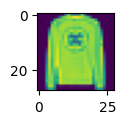

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
It is a Pullover


In [ ]:
game = random.randint(0,len(Y_test-1))
plt.figure(figsize=(1,1))
plt.imshow(X_test[game])
plt.show()

Y_pred = model.predict(X_test)
p = np.argmax(Y_pred[game])
print("It is a", class_names[p])
